# Clustering and Dimensionality Reduction sample (Wholesale customers Data Set)

- Group customers and confirm purchasing trends.
- Hypothesize 2 axes of customer preferences that will serve as the basis for customer analysis.

## Dataset
Wholesale customers Data Set
- https://archive.ics.uci.edu/ml/datasets/wholesale+customers

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import rcParams
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Dataset
DF_RAW = pd.read_csv(
    "Wholesale customers data.csv"
)


In [2]:
# Prepare dataset to use.
display(DF_RAW.head())
display(DF_RAW.shape)

print(
    f'Missing values check:\n{DF_RAW.isnull().sum()}\n'
)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)

Missing values check:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64



In [3]:
channel_values = DF_RAW['Channel'].value_counts()
region_values = DF_RAW['Region'].value_counts()

print(f'Channel labels:\n{channel_values}\n')
print(f'Region labels:\n{region_values}')

Channel labels:
1    298
2    142
Name: Channel, dtype: int64

Region labels:
3    316
1     77
2     47
Name: Region, dtype: int64


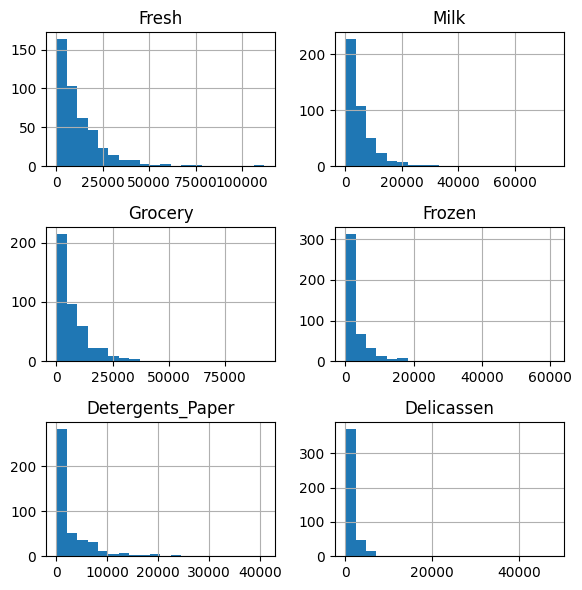

In [4]:
df_basic = DF_RAW.drop(
    ['Channel', 'Region'],
    axis=1
)

# Items histogram display to be analyzed.
rcParams['figure.figsize'] = (6, 6)
df_basic.hist(bins=20)
plt.tight_layout()
plt.show()

In [5]:
"""Clustering
"""
CLUSTERS: int = 4

model = KMeans(
    n_clusters=CLUSTERS,
    n_init=10,
    random_state=0
)
y_pred = model.fit_predict(df_basic)

print(y_pred[:14])

[3 1 3 3 0 3 3 3 3 1 1 3 0 1]


In [6]:
# Average per group
df_clustered = df_basic.groupby(
    y_pred
).mean()

display(df_clustered)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,36144.482759,5471.465517,6128.793103,6298.655172,1064.000000,2316.724138
1,4808.842105,10525.010526,16909.789474,1462.589474,7302.400000,1650.884211
2,19888.272727,36142.363636,45517.454545,6328.909091,21417.090909,8414.000000
3,9087.463768,3027.427536,3753.514493,2817.985507,1003.003623,1040.525362


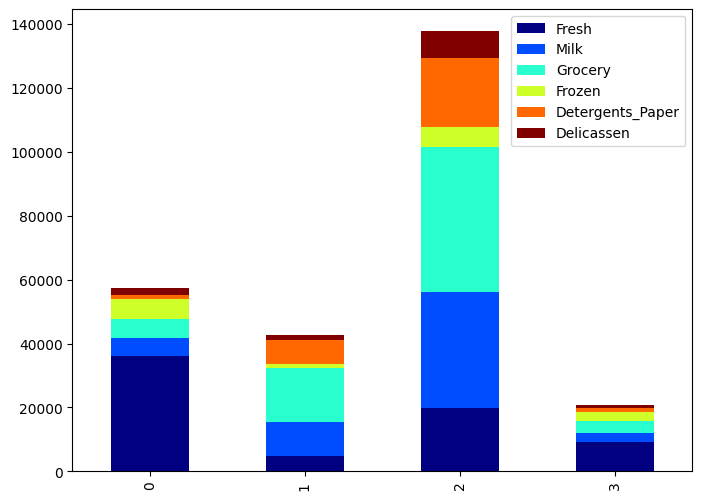

In [7]:
# Displayed in bar graph by group
df_clustered.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    colormap='jet'
)
plt.show()

Trends by group are as follows:

- Comparing Groups 0 and 1, there appears to be no difference in purchase price,
  - Group 0
    - The ratio of __Fresh__ food products is __outstanding__.
  - Group 1
    - The ratio of __Grocery__ food products is __high__.
- Group 2
  - The purchase price appears to be __high__.
- Group 3
  - The purchase price appears to be __low__.

Group 0


/tmp/ipykernel_893/1435717850.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  block.hist(


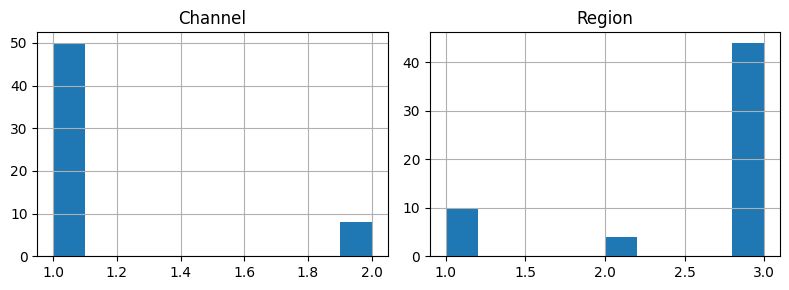

Group 1


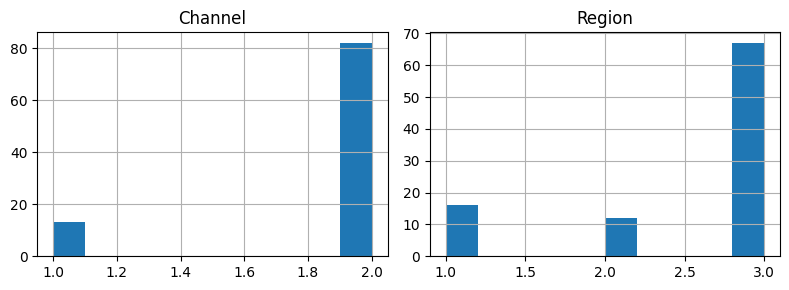

Group 2


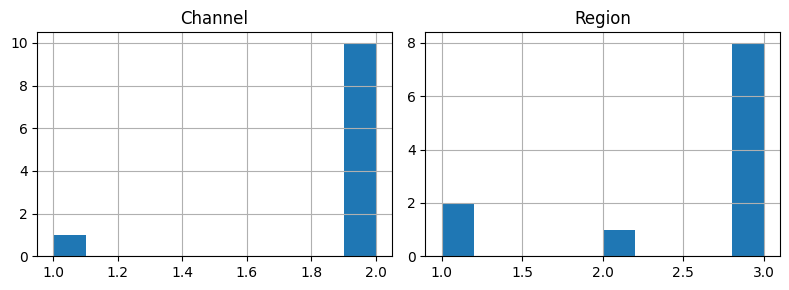

Group 3


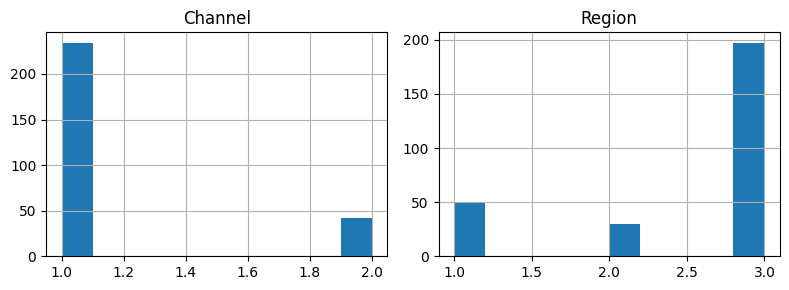

In [8]:
df_channel_and_region = DF_RAW[
    ['Channel', 'Region']
]
rcParams['figure.figsize'] = (8, 3)

for i in range(CLUSTERS):
    _, ax = plt.subplots()
    block = df_channel_and_region[y_pred == i]

    print(f'Group {i}')
    block.hist(
        ax=ax
    )
    plt.tight_layout()
    plt.show()

In [9]:
"""Dimensionality Reduction
"""
pca = PCA(n_components=2)

two_dimensions = pca.fit_transform(df_basic)

# Check if it has been compressed into 2 dimensions.
print(two_dimensions[:10,:])

[[  650.02212207  1585.51909007]
 [-4426.80497937  4042.45150884]
 [-4841.9987068   2578.762176  ]
 [  990.34643689 -6279.80599663]
 [10657.99873116 -2159.72581518]
 [-2765.96159271  -959.87072713]
 [ -715.55089221 -2013.00226567]
 [-4474.58366697  1429.49697204]
 [-6712.09539718 -2205.90915598]
 [-4823.63435407 13480.55920489]]


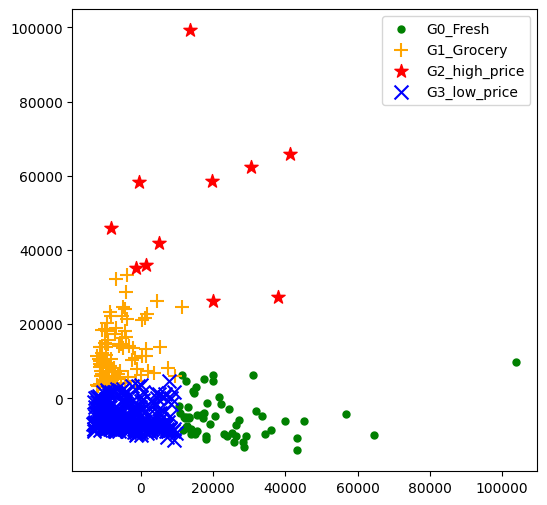

In [10]:
# Utilization for scatter plotting.
labels = [
    'G0_Fresh',
    'G1_Grocery',
    'G2_high_price',
    'G3_low_price'
]
markers = ['.', '+', '*', 'x']
colors = ['green', 'orange', 'red', 'blue']

plt.figure(figsize=(6, 6))
for i in range(CLUSTERS):
    plt.scatter(
        two_dimensions[y_pred == i][:,0],
        two_dimensions[y_pred == i][:,1],
        label=labels[i],
        marker=markers[i],
        c=colors[i],
        s=100
    )
plt.legend()
plt.show()    

In [11]:
# Survey on outliers.
print('G2_high_price: outlier')
display(DF_RAW[two_dimensions[:,1] > 90_000])

print('G0_Fresh: outlier')
display(DF_RAW[two_dimensions[:,0] > 100_000])

print('Each item description')
display(df_basic.describe())

G2_high_price: outlier


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
85,2,3,16117,46197,92780,1026,40827,2944


G0_Fresh: outlier


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
181,1,3,112151,29627,18148,16745,4948,8550


Each item description


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
